# Assignment Topic - Assignment 8 – Stats
## Assignment Submitted By: Naveen Kumar
### Mobile No.-9671833292

In [1]:
import pandas as pd
import statistics
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


## Q1. Import the attached CSV files (Diamond.csv) and answer the following questions:

In [2]:
# Load the CSV file
file_path = "Maths_Descriptive_statistics.csv"  # Update this with the correct path
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   weight   53940 non-null  float64
 7   size     53940 non-null  float64
 8   price    53940 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB
None


In [7]:
# Display the first few rows
print(df.head())

   carat      cut color clarity  depth  table  weight  size  price
0   0.23    Ideal     E     SI2   61.5   55.0    3.95  3.98    326
1   0.21  Premium     E     SI1   59.8   61.0    3.89  3.84    326
2   0.23     Good     E     VS1   56.9   65.0    4.05  4.07    327
3   0.29  Premium     I     VS2   62.4   58.0    4.20  4.23    334
4   0.31     Good     J     SI2   63.3   58.0    4.34  4.35    335


### A.	Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [9]:
# Create a DataFrame with only numerical variables
df_numerical = df.select_dtypes(include=['number'])
df_numerical

,carat,depth,table,weight,size,price
0,0.23,61.5,55.0,3.95,3.98,326
1,0.21,59.8,61.0,3.89,3.84,326
2,0.23,56.9,65.0,4.05,4.07,327
3,0.29,62.4,58.0,4.20,4.23,334
4,0.31,63.3,58.0,4.34,4.35,335
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,2757
53936,0.72,63.1,55.0,5.69,5.75,2757
53937,0.70,62.8,60.0,5.66,5.68,2757
53938,0.86,61.0,58.0,6.15,6.12,2757


In [11]:
# Create a DataFrame with only categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


### B.	Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.

In [13]:
# Calculate measures of central tendency using pandas
pandas_mean = df_numerical.mean()
pandas_median = df_numerical.median()
pandas_mode = df_numerical.mode().iloc[0]  # Mode can have multiple values; selecting the first

In [15]:
# Calculate measures of central tendency using statistics module
statistics_mean = df_numerical.apply(statistics.mean)
statistics_median = df_numerical.apply(statistics.median)
statistics_mode = df_numerical.apply(statistics.mode)

In [17]:
# Compare results in a DataFrame
central_tendency_comparison = pd.DataFrame({
    "Pandas Mean": pandas_mean,
    "Statistics Mean": statistics_mean,
    "Pandas Median": pandas_median,
    "Statistics Median": statistics_median,
    "Pandas Mode": pandas_mode,
    "Statistics Mode": statistics_mode.astype(float)  # Convert to float for consistency
})

# Display the result
print(central_tendency_comparison)

        Pandas Mean  Statistics Mean  Pandas Median  Statistics Median  \
carat      0.797940         0.797940           0.70               0.70   
depth     61.749405        61.749405          61.80              61.80   
table     57.457184        57.457184          57.00              57.00   
weight     5.731157         5.731157           5.70               5.70   
size       5.734526         5.734526           5.71               5.71   
price   3932.799722      3932.799722        2401.00            2401.00   

        Pandas Mode  Statistics Mode  
carat          0.30             0.30  
depth         62.00            62.00  
table         56.00            56.00  
weight         4.37             4.37  
size           4.34             4.34  
price        605.00           605.00  


### C.	Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.

In [19]:
# Calculate skewness for numerical variables
skewness_values = df_numerical.skew()

# Categorizing skewness levels
def categorize_skewness(skew):
    if abs(skew) < 0.5:
        return "Lightly Skewed"
    elif abs(skew) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

skewness_category = skewness_values.apply(categorize_skewness)

# Creating a DataFrame to display results
skewness_df = pd.DataFrame({
    "Skewness Value": skewness_values,
    "Skewness Category": skewness_category
})

# Display the skewness results
print(skewness_df)

        Skewness Value  Skewness Category
carat         1.116646      Highly Skewed
depth        -0.082294     Lightly Skewed
table         0.796896  Moderately Skewed
weight        0.378676     Lightly Skewed
size          2.434167      Highly Skewed
price         1.618395      Highly Skewed


### D.	Use the different transformation techniques to convert skewed data found in previous question into normal distribution.

In [45]:
# Selecting highly skewed variables
skewed_columns = ['carat', 'size', 'price']

# Apply transformations

# Log Transformation (Adding 1 to avoid log(0) errors)
df_log = df_numerical.copy()
df_log[skewed_columns] = df_log[skewed_columns].apply(lambda x: np.log1p(x))

# Square Root Transformation
df_sqrt = df_numerical.copy()
df_sqrt[skewed_columns] = df_sqrt[skewed_columns].apply(lambda x: np.sqrt(x))

# Box-Cox Transformation (Only for positive values)
df_boxcox = df_numerical.copy()
for col in skewed_columns:
    df_boxcox[col], _ = stats.boxcox(df_boxcox[col] + 1)  # Adding 1 to handle zeros


# Checking skewness after transformation
skewness_after_transformation = {
    "Original Skewness": df_numerical[skewed_columns].skew(),
    "Log Transformation": df_log[skewed_columns].skew(),
    "Square Root Transformation": df_sqrt[skewed_columns].skew(),
    "Box-Cox Transformation": df_boxcox[skewed_columns].skew(),
  
}

# Convert results to DataFrame
skewness_results_df = pd.DataFrame(skewness_after_transformation)

# Display the skewness results
print(skewness_results_df)

       Original Skewness  Log Transformation  Square Root Transformation  \
carat           1.116646            0.580654                    0.548471   
size            2.434167            0.006600                    0.363648   
price           1.618395            0.115926                    0.844396   

       Box-Cox Transformation  
carat                0.117887  
size                -0.000807  
price                0.025726  


In [47]:
df_log.head() # Transformed Data After Log Transformation

,carat,depth,table,weight,size,price
0,0.207014,61.5,55.0,3.95,1.605430,5.789960
1,0.190620,59.8,61.0,3.89,1.576915,5.789960
2,0.207014,56.9,65.0,4.05,1.623341,5.793014
3,0.254642,62.4,58.0,4.20,1.654411,5.814131
4,0.270027,63.3,58.0,4.34,1.677097,5.817111


In [25]:
df_sqrt.head() # Transformed Data After square root Transformation

,carat,depth,table,weight,size,price
0,0.479583,61.5,55.0,3.95,1.994994,18.055470
1,0.458258,59.8,61.0,3.89,1.959592,18.055470
2,0.479583,56.9,65.0,4.05,2.017424,18.083141
3,0.538516,62.4,58.0,4.20,2.056696,18.275667
4,0.556776,63.3,58.0,4.34,2.085665,18.303005


In [27]:
df_boxcox.head() # Transformed Data After boxcox Transformation

,carat,depth,table,weight,size,price
0,0.182396,61.5,55.0,3.95,1.595582,4.793885
1,0.169610,59.8,61.0,3.89,1.567412,4.793885
2,0.182396,56.9,65.0,4.05,1.613272,4.795951
3,0.218091,62.4,58.0,4.20,1.643954,4.810232
4,0.229174,63.3,58.0,4.34,1.666351,4.812246


### E.	Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers.

In [29]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_summary = {}
    
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {"Outlier Count": len(outliers), "Outlier Percentage": (len(outliers) / len(df)) * 100}
    
    return pd.DataFrame(outlier_summary).T  # Transpose for better readability
# Check outliers in all numerical variables
outlier_results = detect_outliers_iqr(df_numerical)

# Display results
print(outlier_results)

        Outlier Count  Outlier Percentage
carat          1889.0            3.502039
depth          2545.0            4.718205
table           605.0            1.121617
weight           32.0            0.059325
size             29.0            0.053763
price          3540.0            6.562848


### F.	Convert categorical variables into numerical variables using LabelEncoder technique.

In [33]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables into numerical values
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Display the first few rows after encoding
print(df_encoded.head())

   carat  cut  color  clarity  depth  table  weight  size  price
0   0.23    2      1        3   61.5   55.0    3.95  3.98    326
1   0.21    3      1        2   59.8   61.0    3.89  3.84    326
2   0.23    1      1        4   56.9   65.0    4.05  4.07    327
3   0.29    3      5        5   62.4   58.0    4.20  4.23    334
4   0.31    1      6        3   63.3   58.0    4.34  4.35    335


### G.	Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.

In [35]:
# Initialize Scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling
df_standard_scaled = df_encoded.copy()
df_standard_scaled[df_encoded.columns] = standard_scaler.fit_transform(df_encoded)

# Apply Min-Max Scaling
df_minmax_scaled = df_encoded.copy()
df_minmax_scaled[df_encoded.columns] = minmax_scaler.fit_transform(df_encoded)

# Display the first few rows after scaling
print("Standard Scaled Data:")
print(df_standard_scaled.head())

print("\nMin-Max Scaled Data:")
print(df_minmax_scaled.head())

Standard Scaled Data:
      carat       cut     color   clarity     depth     table    weight  \
0 -1.198168 -0.538099 -0.937163 -0.484264 -0.174092 -1.099672 -1.587837   
1 -1.240361  0.434949 -0.937163 -1.064117 -1.360738  1.585529 -1.641325   
2 -1.198168 -1.511147 -0.937163  0.095589 -3.385019  3.375663 -1.498691   
3 -1.071587  0.434949  1.414272  0.675442  0.454133  0.242928 -1.364971   
4 -1.029394 -1.511147  2.002131 -0.484264  1.082358  0.242928 -1.240167   

       size     price  
0 -1.536196 -0.904095  
1 -1.658774 -0.904095  
2 -1.457395 -0.903844  
3 -1.317305 -0.902090  
4 -1.212238 -0.901839  

Min-Max Scaled Data:
      carat   cut     color   clarity     depth     table    weight      size  \
0  0.006237  0.50  0.166667  0.428571  0.513889  0.230769  0.367784  0.067572   
1  0.002079  0.75  0.166667  0.285714  0.466667  0.346154  0.362197  0.065195   
2  0.006237  0.25  0.166667  0.571429  0.386111  0.423077  0.377095  0.069100   
3  0.018711  0.75  0.833333  0.714286

### H.	Create the Histogram for all numeric variables and draw the KDE plot on that.

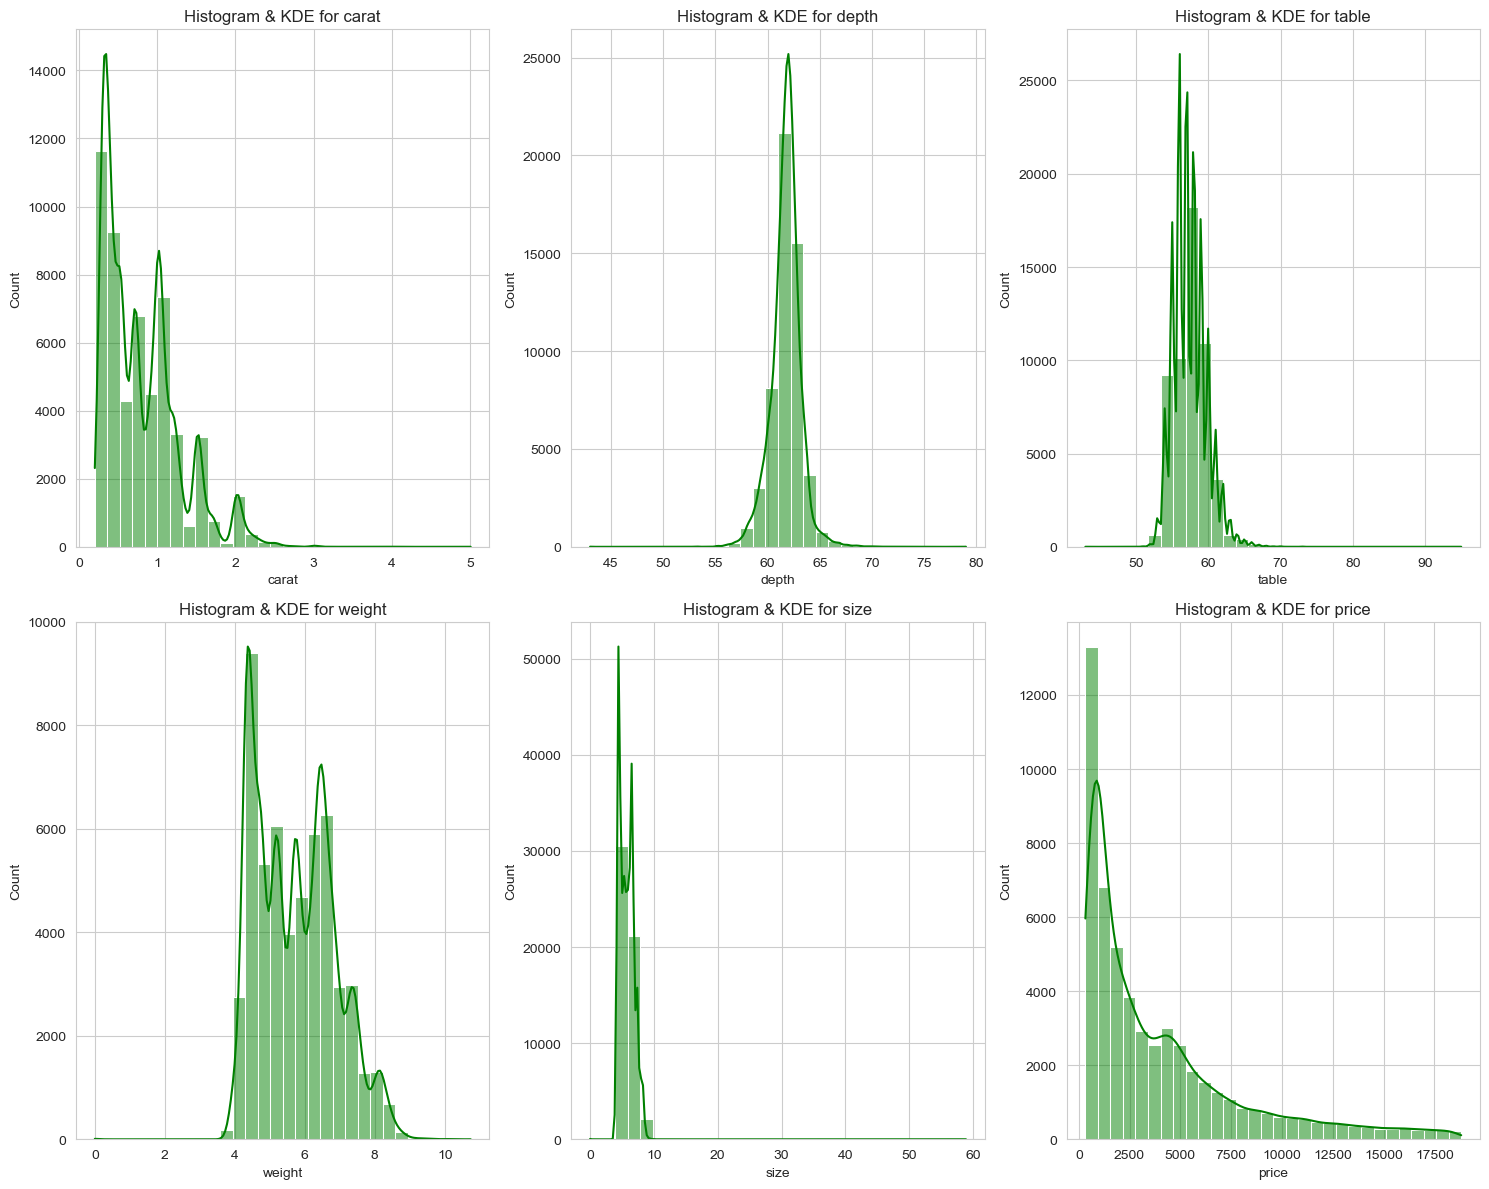

In [37]:
# Set plot style
sns.set_style("whitegrid")

# Create histograms with KDE plots for all numerical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))  # Adjust grid size based on number of variables
axes = axes.flatten()

# Plot histogram and KDE for each numeric column
for i, col in enumerate(df_numerical.columns):
    sns.histplot(df_numerical[col], kde=True, bins=30, ax=axes[i],color ='Green')
    axes[i].set_title(f'Histogram & KDE for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

### I.	Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data.

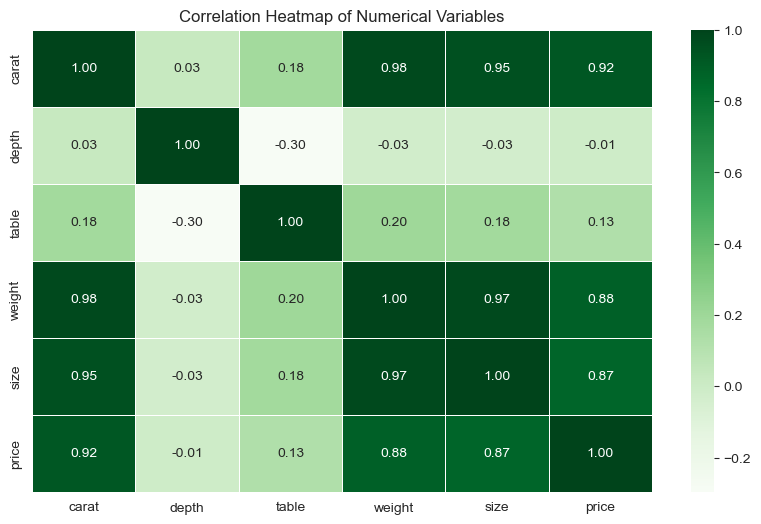

In [39]:
# Generate correlation matrix
correlation_matrix = df_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [41]:
# Conclusion from the above Heat Map

# Set correlation threshold values
high_corr_threshold = 0.7  # Strong correlation
low_corr_threshold = 0.3   # Weak correlation

# Get the correlation matrix
correlation_matrix = df_numerical.corr()

# Find highly correlated variable pairs (excluding self-correlation)
highly_correlated_pairs = [(col1, col2, correlation_matrix.loc[col1, col2])
                           for col1 in correlation_matrix.columns
                           for col2 in correlation_matrix.columns
                           if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > high_corr_threshold]

# Find weakly correlated variables with price
weakly_correlated_with_price = [col for col in correlation_matrix.columns
                                if abs(correlation_matrix['price'][col]) < low_corr_threshold and col != 'price']

# Print conclusions
print("### Strongly Correlated Variables ###")
for col1, col2, corr in highly_correlated_pairs:
    print(f"{col1} and {col2} have a strong correlation of {corr:.2f}")

print("\n### Weakly Correlated Variables with Price ###")
print(f"These variables have weak correlation with price: {weakly_correlated_with_price}")

# Determine key predictive features
important_features = [col1 for col1, col2, _ in highly_correlated_pairs if col2 == 'price'] + \
                     [col2 for col1, col2, _ in highly_correlated_pairs if col1 == 'price']
important_features = list(set(important_features))  # Remove duplicates

print("\n### Recommended Features for Price Prediction ###")
print(f"Key features impacting price: {important_features}")


### Strongly Correlated Variables ###
carat and weight have a strong correlation of 0.98
carat and size have a strong correlation of 0.95
carat and price have a strong correlation of 0.92
weight and carat have a strong correlation of 0.98
weight and size have a strong correlation of 0.97
weight and price have a strong correlation of 0.88
size and carat have a strong correlation of 0.95
size and weight have a strong correlation of 0.97
size and price have a strong correlation of 0.87
price and carat have a strong correlation of 0.92
price and weight have a strong correlation of 0.88
price and size have a strong correlation of 0.87

### Weakly Correlated Variables with Price ###
These variables have weak correlation with price: ['depth', 'table']

### Recommended Features for Price Prediction ###
Key features impacting price: ['size', 'carat', 'weight']


## Q2. Explain Gradient descent in detail. How changing the values of learning rate can impact the convergence in Gradient Descent.

### Gradient Descent is an iterative optimization algorithm used to find the local minimum of a differentiable function.In machine learning, this function is typically the cost function (or loss function), which measures the error between a model's predictions and the actual data. The algorithm works by repeatedly adjusting the model's parameters in the direction of the steepest decrease of the cost function, guided by the negative of the gradient.

## How changing the values of learning rate can impact the convergence in Gradient Descent.

### The learning rate (α) is a critical hyperparameter in Gradient Descent that dictates the step size taken in each iteration to minimize the cost function. Its value significantly impacts the algorithm's convergence:   

## Too Small α:

#### Slow Convergence: Tiny steps lead to a very gradual descent towards the minimum, requiring many iterations and potentially long training times.   
#### Risk of Getting Stuck: The algorithm might get trapped in shallow local minima and take an impractical amount of time to escape, if at all.
#### More Stable Steps: Less likely to overshoot the minimum in each step.

## Appropriate α:

#### Faster Convergence: Balanced step size allows for reasonably quick progress towards the minimum.
#### Stability: Avoids excessive oscillations and converges in a manageable number of iterations.
#### Effective Optimization: Likely to reach a good local minimum efficiently.
### Too Large α:

#### Overshooting: Large steps can cause the algorithm to jump over the minimum, landing on a higher cost value on the other side.   
#### Oscillations: The algorithm might oscillate wildly around the minimum without settling, leading to inefficient training.   
#### Divergence: In extreme cases, the cost function might increase with each iteration, and the parameters move further away from the optimal values, preventing convergence.
#### Unstable Training: The learning process becomes erratic and unreliable.   
## Conclusion:

### Selecting an appropriate learning rate is crucial for efficient and stable convergence in Gradient Descent. Too small a value leads to slow progress, while too large a value can cause instability and prevent the algorithm from finding the minimum. Techniques like learning rate tuning and adaptive learning rate methods are often employed to address this challen